## Is Fandango still inflating movie ratings?

In 2015 journalist Walt Hickey published __[this article](https://fivethirtyeight.com/features/fandango-movies-ratings/)__ with strong evidence Fandango's rating system was unfairly inflated. In this project we will analyze more recent movie rating data to determine if there have been any changes to Fandango's rating system since the Walt Hickey article.

## Understanding the data

In this project we will be working with two different samples of data. One will be a sample collected __[_prior_](https://github.com/fivethirtyeight/data/tree/master/fandango)__ to Hickey's investigation with the other collected __[_after_](https://github.com/mircealex/Movie_ratings_2016_17)__. We will start reading in the files and getting familiar with their framework.

In [25]:
import pandas as pd
pd.options.display.max_columns = 100

previous = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv')
after = pd.read_csv('https://raw.githubusercontent.com/mircealex/Movie_ratings_2016_17/master/movie_ratings_16_17.csv')

previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [26]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Next we will isolate the columns from the above data that pertain to our investigation of Fandango ratings. We'll make copies to __[avoid](https://www.dataquest.io/blog/settingwithcopywarning/)__ a SettingWithCopyWarning further down the road in our investigation.

In [27]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                             'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [28]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine if any change has occurred in Fandango's online rating system since Hickey's analysis. Our population of interest for this analysis would be all the movie ratings stored on Fandango's website, regardless of the year of release.

We are trying to determine if the parameters of the population have changed after Hickey's analysis. In order to aaccomplish this we need to look at the population at two different periods of time, _before_ and _after_ his analysis. This would let us compare the two different states of the population.

The data we currently have was sampled at the moments we want, one set before and one after. We are trying to describe a population and we want a sample that is representative of the entire population. Otherwise we could expect significant sampling error and possibly draw inaccurate conclusions. 

For our _before_ case we can look at the `READ.md` of Hickey's __[data set repository](https://github.com/fivethirtyeight/data/tree/master/fandango)__ to find the following sampling criteria:

- Tickets available for sale in 2015
- Minimum of 30 fan ratings on Fandango on August 24, 2015

This is clearly not a random sampling of the population as not every movie had an equal chance of being included. Some were completely excluded (those with under 30 fan reviews and those that did not have ticket sales in 2015). It is quite unlikely that this sample is representative of our desired population. It excludes certain movies and is also subject to _temporal trends_ . We don't know if the movies in 2015 are average or exceedingly better or worse compared to other years.

The following sampling conditions for our _after_ case may also be found in it's `READ.md` of the __[data set repository](https://github.com/mircealex/Movie_ratings_2016_17)__:

- Release year of 2016 or 2017
- Received a significant number of votes (significant was not defined in the `READ.md` documentation)

This sampling of data is also very subject to _temporal trends_ and not likely to be representative of our population of interest.

The authors obviously had certain questions they were trying to answer when they did their sampling. They used criteria for sampling that would fit their questions. This __[purposive sampling](https://www.thoughtco.com/purposive-sampling-3026727)__ worked well for their research but isn't particularly useful for us.

## Changing Analysis Goal

With the understanding that we do not have a representative sample of our population of interest, we have two options. Collect different samples or change the goal of our analysis. We will be doing the second as it will likely be a good proxy for our original goal.

Instead of trying to determine whether Fandango changed their rating system after Hickey's analysis, we will instead investigate if there is a difference in Fandango's ratings of popular movies in 2015 and their ratings of popular movies in 2016. This should work as a good proxy for our original goal.

## Isolating the Samples

Given our new goal, we now have these two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We need to define what popular means in terms of our movies. Hickey used 30 fan ratings on Fandango. We will continue to use that definition, assuming the average number of Fandango fan ratings per movie would remain fairly consistent from 2015 to 2016.

Since we are using this definition of popularity, we need to examine whether our _after_ data is representative of our population of interest. It contains no data concerning the number of Fandango fan ratings.

One way to explore this is to take a randomized sample of 10 movies from our data and determine if it might be representative of our population. Ideally we'd like 8 or more movies from our sample to have more than 30 fan ratings.

In [29]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a random seed of 1 as good practice, thereby showing we are not attempting to manipulate the results using different seeds to get a favorable conclusion.

We are borrowing results from __[mircealex](https://github.com/mircealex)__ to show what the number of fan ratings were for these movies in April 2018. As of late May 2019 Fandango has switched away from the five-star fan rating and has implemented ratings from __[Rotten Tomatoes](https://www.rottentomatoes.com/)__ on it's website and app.

| Movie | Fan Ratings |
| :--- | :--- |
|Mechanic Resurrection | 2247 | 
| Warcraft | 7271 |
| Max Steel | 493 |
| Me Before You | 5263 |
| Fantastic Beasts and Where to Find Them | 13400 |
| Cell | 17 |
| Genius | 127 |
| Sully | 11877 |
| A Hologram for the King | 500 |
| Captain America: Civil War | 35057 |

90% of our randomized sample fits our definition of popular. Therefore we can proceed with more confidence.

We will also double check to be sure our data from _before_ fits our definition. It was stated that all the movies should have over 30 fan ratings.

In [30]:
sum(fandango_previous['Fandango_votes'] <= 30)

0

In both data sets we have movies that do not have releasing years of 2015 or 2016. We will isolate the the 2015 and 2016 movies here for our purposes. 

We will start by isolating all the 2015 release movies from Hickey's data set. There is no specific release year column contained in this data. We can however extract it from the `FILM`  data column.

In [31]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [32]:
fandango_previous['release_year'] = fandango_previous['FILM'].str[-5:-1]
#double check
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,release_year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [33]:
# checking years and 2015 total
fandango_previous['release_year'].value_counts()

2015    129
2014     17
Name: release_year, dtype: int64

In [34]:
#get all films with release year 2015
fandango_2015 = fandango_previous[fandango_previous['release_year'] == '2015'].copy()
#check work
fandango_2015['release_year'].value_counts()

2015    129
Name: release_year, dtype: int64

Now we will get the films from the second set of data corresponding to a release year of 2016.

In [35]:
#check years and 2016 total
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [36]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
#check work
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution for 2015 and 2016

Our goal is to figure out if there is any difference between Fandango's fan rating of popular movies from 2015 to 2016. One way is to take a look at the shape of the distributions of fan ratings for each of the years and compare them.

We will be using __[fivethirtyeight style](https://matplotlib.org/3.1.1/gallery/style_sheets/fivethirtyeight.html)__ for our plot to help in the comparison to Hickey's earlier work.

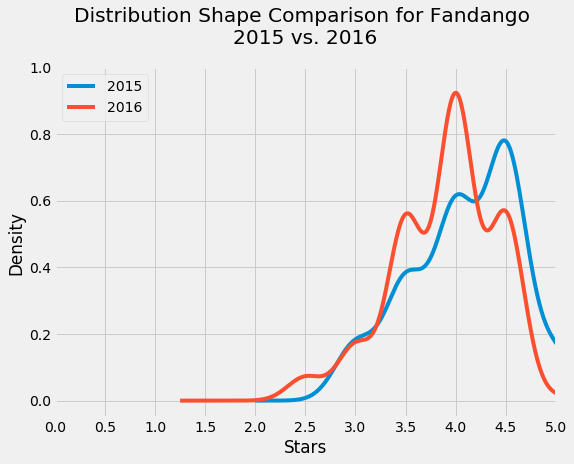

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8, 6))
fandango_2016['fandango'].plot.kde(label='2016', legend = True)

plt.title('Distribution Shape Comparison for Fandango \n2015 vs. 2016', y = 1.05)
#y param lifts title above chart y=1 is top of chart
plt.xlim(0,5) # range of fandango stars
plt.ylim(-.05, 1)
plt.xlabel('Stars')
plt.ylabel('Density')
plt.xticks(arange(0, 5.5, .5))
plt.show()

Two things stand out from the above graph:
- Both distirbutions are quite left skewed
- The 2016 distribution appears to be shifted to the left relative to the 2015 distribution

The distributions being left skewed would indicate that almost all the movies receive high and very high fan ratings on Fandango. Again, just like with Hickey's analysis, this does seem a bit suspect given that Fandango also sells movie tickets. Investigating this further would be a worthy effort, however, it is beyond our scope here in this particular analysis.

The 2016 shift to the left is notable for us. We can see that the ratings for 2016 appear slightly lower than 2015 given the distribution shapes observed above.

## Comparing Relative Frequencies

Now that we have a high level overall view of the 2015 and 2016 data, let's dig a bit deeper. We will get a bit more granular in our analysis. First we will look at the frequency distributions for each set of data by star rating. The two sets of data contain different numbers of movies so we will normalize the frequencies and show percentages.

In [38]:
#print years for simplicity and ease of reading
print('2015 Fandango Star Ratings'+ '\n' + '_'*16)
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015 Fandango Star Ratings
________________


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [39]:
print('2016 Fandango Star Ratings'  +'\n' + '_'*16)
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016 Fandango Star Ratings
________________


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see above that there are definitely differences in the distributions. On the high end, we can see that in 2015 there were almost 7% of movies rated with 5 stars, while in 2016 there were less than 1%. In addition, there were about 13% less 4.5 star ratings in 2016 compared to 2015. 

On the lower end, we can observe that in 2016 there were fan ratings of 2.5 stars, lower than any rating in 2015. There was also a similar percentage of fan ratings with 3 stars.

For some of the other ratings, 2016 had higher ratings. Both the 3.5 and 4.0 star ratings were higher in the year after Hickey's article. These numbers each represent high ratings and would contradict the direction of change we suspected in the kernel density plot above.

## Determining Change Direction

Now we will look at some summary metrics to get a better idea of the direction of the change from 2015 to 2016. We will compute the mean, median and mode of both sets of data and then compare them on a bar chart.

In [40]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

metrics = pd.DataFrame()
metrics['2015'] = [mean_2015, median_2015, mode_2015]
metrics['2016'] = [mean_2016, median_2016, mode_2016]
metrics.index = ['Mean', 'Median', 'Mode']
metrics

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


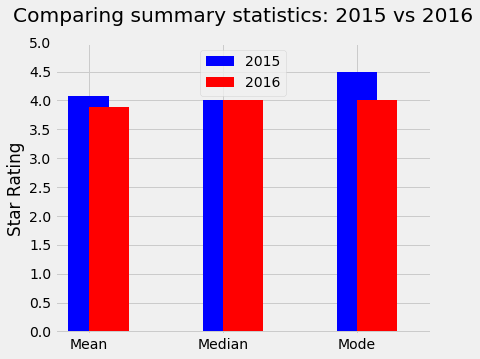

In [41]:
plt.style.use('fivethirtyeight')
metrics['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .3)
metrics['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .3,
                         rot = 0, figsize = (6,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.05)
plt.ylim(-0.05,5)
plt.yticks(arange(0,5.5,.5))
plt.ylabel('Star Rating')
plt.legend(loc = 'upper center')
plt.show()

The mean Fandango rating in 2016 was approximately 0.2 lower than in 2015. This represents about a 5% drop compared to 2015.

In [42]:
#calculating % drop in mean 2015 to 2016
(metrics.loc['Mean'][0] - metrics.loc['Mean'][1]) / metrics.loc['Mean'][0]

0.04842683568951993

Although we observe the median is the same for both years, the mode is less in 2016 by 0.5 stars as compared to 2015. Combine this with what we see above for the mean, we can confirm the direction we saw in the kernel density plot earlier: on average, Fandango movie ratings for popular movies released in 2016 were slightly lower than popular movies released in 2015.

We have determined there is indeed a slight change in Fandango's ratings after Hickey's analysis. Next  we will examine if our assumption that movie ratings remained consistent between 2015 and 2016 was correct. We will accomplish this by comparing the ratings from other rating systems in our data from 2015 to 2016. 

## 2016 vs. 2015 Movie Rating Comparison Across Other Sites

We need data from both before and after Hickey's article from the other rating sites he used in his original analysis. We will perform the same data cleaning procedures to isolate the 2015 and 2016 ratings data.

In [43]:
#getting data we want from befor Hickey analysis
norm_ratings_before = previous[['FILM', 'Fandango_Stars', 'Metacritic_norm_round',
                               'IMDB_norm_round', 'RT_norm_round', 'RT_user_norm_round']].copy()
norm_ratings_before.head()

,FILM,Fandango_Stars,Metacritic_norm_round,IMDB_norm_round,RT_norm_round,RT_user_norm_round
0,Avengers: Age of Ultron (2015),5.0,3.5,4.0,3.5,4.5
1,Cinderella (2015),5.0,3.5,3.5,4.5,4.0
2,Ant-Man (2015),5.0,3.0,4.0,4.0,4.5
3,Do You Believe? (2015),5.0,1.0,2.5,1.0,4.0
4,Hot Tub Time Machine 2 (2015),3.5,1.5,2.5,0.5,1.5


In [44]:
#getting data we want for after Hickey analysis
norm_ratings_after = after[['movie', 'year', 'fandango', 'nr_metascore', 'nr_imdb',
                            'nr_tmeter', 'nr_audience']].copy()
norm_ratings_after.head()

,movie,year,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,3.5,4.0,3.5,4.5,4.0
1,13 Hours,2016,4.5,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,3.0,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,4.5,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,3.0,3.0,3.0,3.5,3.0


In [45]:
#cleaning up first dataframe
#getting release years
norm_ratings_before['year'] = norm_ratings_before['FILM'].str[-5:-1]
# getting 2015 films only
norm_ratings_2015 = norm_ratings_before[norm_ratings_before['year'] == '2015'].copy()

#checking work
norm_ratings_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [46]:
#renaming for consistency
norm_ratings_2015 = norm_ratings_2015.rename(columns ={'FILM':'movie', 'Fandango_Stars': 'fandango', 
                                  'Metacritic_norm_round': 'nr_metascore',
                                  'IMDB_norm_round': 'nr_imdb',
                                  'RT_norm_round': 'nr_tmeter', 
                                  'RT_user_norm_round': 'nr_audience'})
norm_ratings_2015.head()

,movie,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience,year
0,Avengers: Age of Ultron (2015),5.0,3.5,4.0,3.5,4.5,2015
1,Cinderella (2015),5.0,3.5,3.5,4.5,4.0,2015
2,Ant-Man (2015),5.0,3.0,4.0,4.0,4.5,2015
3,Do You Believe? (2015),5.0,1.0,2.5,1.0,4.0,2015
4,Hot Tub Time Machine 2 (2015),3.5,1.5,2.5,0.5,1.5,2015


In [47]:
#gettings 2016 films
norm_ratings_2016 = norm_ratings_after[norm_ratings_after['year'] == 2016].copy()

#checking work
norm_ratings_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In order to examine and compare the distributions of all five rating systems we will be using boxplots. The first set represents the rating data from 2015, while the second represents the 2016 ratings. In the graph below, the red line in each plot represents the mean and the box itself represents the interquartile range. Interquartile range is the range from the 25th percentile up to the 75th percentile. 

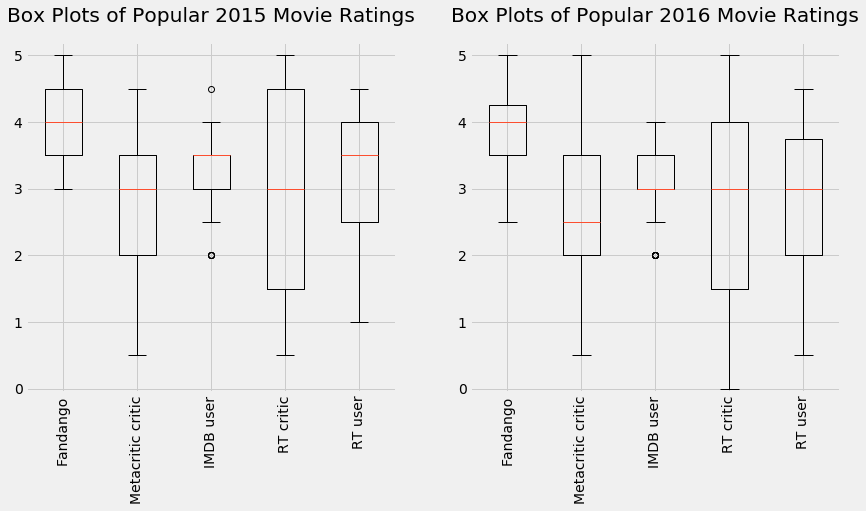

In [48]:
#comparing ratings data with boxplots
plt.style.use('fivethirtyeight')
num_cols = ['fandango', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']
col_labels = ['Fandango', 'Metacritic critic', 'IMDB user', 'RT critic', 'RT user']
fig = plt.figure(figsize=(13, 6))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)

ax1.boxplot(norm_ratings_2015[num_cols].values)
ax1.set_title('Box Plots of Popular 2015 Movie Ratings', y=1.04)
ax1.set_xticklabels(col_labels, rotation = 90)
ax1.set_ylim(-0.05, 5.2)

ax2.set_title('Box Plots of Popular 2016 Movie Ratings', y=1.04)
ax2.boxplot(norm_ratings_2016[num_cols].values)
ax2.set_xticklabels(col_labels, rotation = 90)
ax2.set_ylim(-0.05, 5.2)

plt.show()

In the above graphs, we can confirm that Fandango's user ratings did indeed become slightly lower in 2016. However, we also observe that the mean for 3 of the 4 other rating systems is lower for 2016, while Fandango's and Rotten Tomato critic's remained the same. This shows evidence of an _increase_ in disparity between Fandango and other online rating systems. 

We can also note that the interquartile range is skewed upward in both years as compared to other rating systems. Although the 2016 Fandango scores were lower than 2015, there was an increase in the ratings _difference_ when compared to the other rating systems Hickey used.

## Conclusion

The analysis above shows that Fandango's ratings for popular movies released in 2016 were slightly lower than Fandango's ratings for popular movies released in 2015. 

We also provided evidence that although Fandango did indeed lower their ratings in 2016, the disparity between Fandango and other sites actually increased.

Unfortunately, this analysis is now outdated. Fandango bought Rotten Tomatoes in 2016. In addition movies released after  May 17, 2019 are no longer subject to Fandango's 5 star rating system. They now exclusively use Rotten Tomatoes Tomatometer and Rotten Tomatoes audience score which is the percentage of audience members that rate the movies 3.5 stars or better out of 5 stars and have verified ticket purchases through Fandango. Fandango has made claims that using the new scores is not about driving ticket sales. I have serious doubts about that particular claim, remembering that Fandango is a NBC Universal company, but that is beyond the scope of our current analysis.